<a href="https://colab.research.google.com/github/pouriakouhzadeh/CoinMarketCap-Data-fetch/blob/master/Cryptocurrency%20forcast%20by%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
 
data = pd.read_csv('2017.csv', date_parser = True)
data.columns=['Date', 'time', 'open', 'high', 'low','close','vlome']


data.dropna(subset = ["close"], inplace=True)
data.tail(10)

,Date,time,open,high,low,close,vlome
32055,2018.01.31,23:49,1.24198,1.24210,1.24197,1.24207,0
32056,2018.01.31,23:50,1.24207,1.24212,1.24207,1.24209,0
32057,2018.01.31,23:51,1.24207,1.24207,1.24201,1.24202,0
32058,2018.01.31,23:52,1.24205,1.24214,1.24205,1.24214,0
32059,2018.01.31,23:53,1.24215,1.24219,1.24215,1.24219,0
32060,2018.01.31,23:54,1.24218,1.24218,1.24206,1.24208,0
32061,2018.01.31,23:55,1.24207,1.24207,1.24198,1.24198,0
32062,2018.01.31,23:56,1.24199,1.24201,1.24192,1.24201,0
32063,2018.01.31,23:57,1.24202,1.24204,1.24201,1.24201,0
32064,2018.01.31,23:58,1.24201,1.24212,1.24201,1.24206,0


In [29]:
data_training = data[data['Date']< '2017-10-01'].copy()
data_test = data[data['Date']>= '2017-10-01'].copy()

training_data = data_training.drop(['Date', 'time','vlome'], axis = 1)
training_data

 


,open,high,low,close
0,1.20083,1.20095,1.20017,1.20030
1,1.20035,1.20043,1.20035,1.20043
2,1.20041,1.20050,1.20031,1.20046
3,1.20049,1.20049,1.20046,1.20048
4,1.20050,1.20050,1.20048,1.20048
...,...,...,...,...
32060,1.24218,1.24218,1.24206,1.24208
32061,1.24207,1.24207,1.24198,1.24198
32062,1.24199,1.24201,1.24192,1.24201
32063,1.24202,1.24204,1.24201,1.24201


In [5]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.14857421, 0.14742451, 0.14091653, 0.14005829],
       [0.14079715, 0.13902793, 0.14386252, 0.14216321],
       [0.14176928, 0.14015824, 0.14320786, 0.14264896],
       ...,
       [0.8154569 , 0.81043113, 0.82422259, 0.81541451],
       [0.81594297, 0.81091555, 0.82569558, 0.81541451],
       [0.81578095, 0.81220733, 0.82569558, 0.81622409]])

In [12]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
     
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(32005, 60, 4)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            11000     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_17 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_18 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
577/577 [==============================] - 173s 289ms/step - loss: 0.0086 - val_loss: 0.0167
Epoch 2/20
577/577 [==============================] - 169s 293ms/step - loss: 0.0037 - val_loss: 0.0209
Epoch 3/20
577/577 [==============================] - 166s 288ms/step - loss: 0.0036 - val_loss: 0.0150
Epoch 4/20
577/577 [==============================] - 166s 288ms/step - loss: 0.0029 - val_loss: 0.0109
Epoch 5/20
577/577 [==============================] - 167s 290ms/step - loss: 0.0021 - val_loss: 0.0270
Epoch 6/20
577/577 [==============================] - 168s 292ms/step - loss: 0.0018 - val_loss: 0.0219
Epoch 7/20
577/577 [==============================] - 167s 290ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 8/20
577/577 [==============================] - 166s 288ms/step - loss: 0.0017 - val_loss: 0.0183
Epoch 9/20
577/577 [==============================] - 168s 291ms/step - loss: 0.0017 - val_loss: 0.0142
Epoch 10/20
577/577 [==============================] - 166s 288m

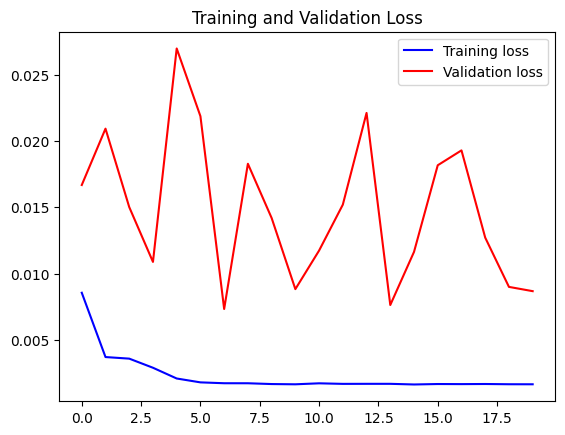

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [31]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'time','vlome'], axis = 1)
df.head()

<ipython-input-31-f7a1b713f112>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,open,high,low,close
0,1.20083,1.20095,1.20017,1.20030
1,1.20035,1.20043,1.20035,1.20043
2,1.20041,1.20050,1.20031,1.20046
3,1.20049,1.20049,1.20046,1.20048
4,1.20050,1.20050,1.20048,1.20048


In [32]:
inputs = scaler.transform(df)

In [33]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_pred = model.predict(X_test) 

1001/1001 [==============================] - 73s 72ms/step


In [34]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

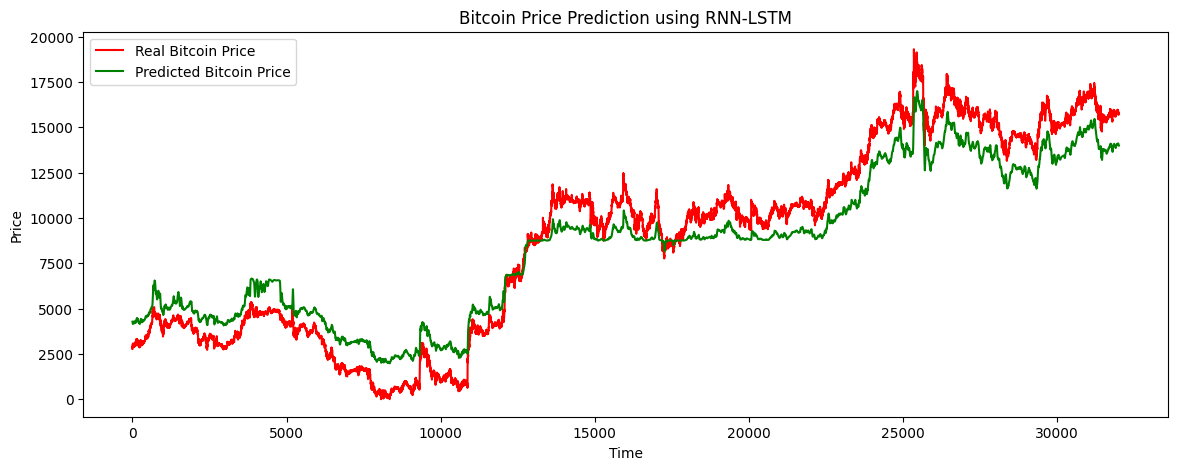

In [35]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()